In [1]:
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# read names that have provided survey eye color data
columns = ['name', 'left', 'right', 'left_desc', 'right_desc']
# pgp eye color data from survey
surveyData = pd.read_csv("PGP-eyecolor.csv", names=columns, na_values=['nan', ''])
# names of the pgp participants
surveyNames = np.asarray(surveyData['name'].values.tolist())
leftEyeColors = surveyData['left']
rightEyeColors = surveyData['right']

In [3]:
# load numpy array of names
pgpNames = np.load("names.npy")
# load numpy array of tiled data and delete the extra information
pgp = np.load("hiq-pgp.npy")
for i in range(len(pgpNames)):
    pgpNames[i] = pgpNames[i][:8]

In [4]:
def getData(name, surveyData):
    for index, row in surveyData.iterrows():
        if row['name'] == name:
            return (row['left'], row['right'])

In [5]:
# populate name dictionaries with respective eye color data
namePairIndices = []
nameLeftEyeMap = {}
nameRightEyeMap = {}
for i in range(len(pgpNames)):
    if pgpNames[i] in surveyNames:
        eyeData = getData(pgpNames[i], surveyData)
        namePairIndices.append((i, pgpNames[i]))
        nameLeftEyeMap[pgpNames[i]] = eyeData[0]
        nameRightEyeMap[pgpNames[i]] = eyeData[1]

# create lists containing the known eye color names and the unknown ones.
nameIndices = [nameIndex[0] for nameIndex in namePairIndices]
knownData = pgp[nameIndices]
unknownData = np.delete(pgp, nameIndices, axis=0)

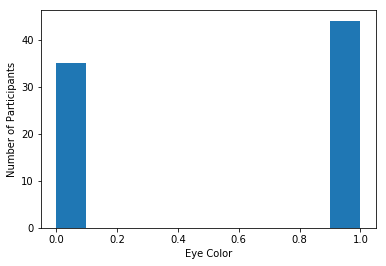

In [6]:
# convert dictionaries to lists using knownData
leftEyeNameList = []
rightEyeNameList = []

knownDataNames = [nameIndices]
for nameTuple in namePairIndices:
    leftEyeNameList.append(nameLeftEyeMap[nameTuple[1]])
    rightEyeNameList.append(nameRightEyeMap[nameTuple[1]])
    
for i in range(len(leftEyeNameList)):
    eyeColor = leftEyeNameList[i]
    if eyeColor > 12:
        leftEyeNameList[i] = 1
    else:
        leftEyeNameList[i] = 0
        
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(leftEyeNameList)
plt.ylabel("Number of Participants")
plt.xlabel("Eye Color")
plt.show()

In [7]:
from sklearn import preprocessing
knownData = preprocessing.scale(knownData.astype('double'))
knownData

array([[-0.1132277,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-0.1132277,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-0.1132277,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ..., 
       [-0.1132277,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-0.1132277,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-0.1132277,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ]])

In [8]:
svc_test = LinearSVC(penalty='l1', class_weight='balanced', 
                         C=.1, dual=False, verbose=1, max_iter=5000)
svc_test.fit(knownData, leftEyeNameList)

nonzeroes = np.nonzero(svc_test.coef_[0])[0]
print svc_test.coef_[0].max()
arr = np.asarray(nonzeroes)

[LibLinear]0.0732878182289


In [9]:
eye_pred = svc_test.predict(knownData)
accuracy_score(leftEyeNameList, eye_pred)

1.0

In [10]:
coefs = zip(nonzeroes, svc_test.coef_[0][nonzeroes])
coefs.sort(key = lambda x: x[1], reverse=True)
posCoefs = []
print len(coefs)
for coef in coefs:
    if coef[1] > 0:
        posCoefs.append(coef)

66


In [11]:
print len(posCoefs)
print posCoefs

32
[(342019, 0.073287818228881113), (1257816, 0.068499901488679224), (1321008, 0.060255301634782689), (903627, 0.057442531066330876), (200986, 0.052621181923676305), (71357, 0.039888718212934902), (481212, 0.037393805021111184), (137247, 0.035022087220495296), (2393717, 0.030617314865758232), (674644, 0.029776971294740721), (768874, 0.02850189592204529), (1170439, 0.02499678255873632), (2189921, 0.024079654020872806), (1081477, 0.023894305731308272), (579760, 0.022093201364864506), (12624, 0.018269043671337928), (402803, 0.017876858213734217), (1021400, 0.016898117015024874), (1594144, 0.016016553931013085), (1739893, 0.012346453717763089), (2043646, 0.012196202445977496), (1435117, 0.011799935080254767), (2043901, 0.011364952881902153), (2088511, 0.011355708183568923), (596164, 0.0079473926359385251), (2461525, 0.0074619689249398454), (2166165, 0.0048371068547821148), (1779879, 0.0032848432652270998), (2147444, 0.0032778105409504775), (228289, 0.0012294601917930759), (584122, 0.000891

In [12]:
posLocs = [coef[0] for coef in posCoefs]
print posLocs
pos = np.asarray(posLocs)
pos.dump("coefs.pkl")

[342019, 1257816, 1321008, 903627, 200986, 71357, 481212, 137247, 2393717, 674644, 768874, 1170439, 2189921, 1081477, 579760, 12624, 402803, 1021400, 1594144, 1739893, 2043646, 1435117, 2043901, 2088511, 596164, 2461525, 2166165, 1779879, 2147444, 228289, 584122, 551190]
